Общее число отличников:  23368
Школа с лучшими результатами по ЕГЭ в Москве:  Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский университет» Высшая школа экономики». лицей Национального исследовательского университета» Высшая школа экономики»
Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


(221, b'2.0.0 Closing connection.')

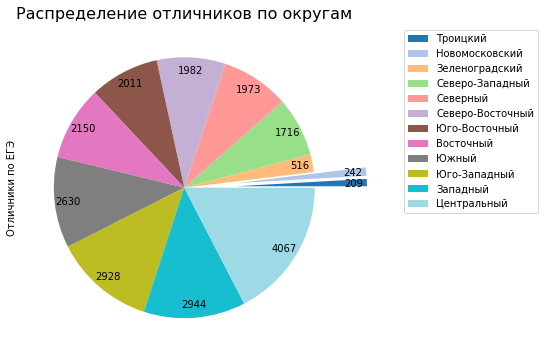

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import binascii
import pdfkit
import smtplib
from email import encoders
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart

data = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv', delimiter=';')

data = data[data['YEAR'] == '2018-2019']
data['AdmArea'] = data['AdmArea'].apply(lambda x: x.split(' ')[0]) 

fig = plt.figure(figsize=(11, 6))
area = fig.add_subplot(1, 1, 1)
data_adm = data.groupby('AdmArea').sum()['PASSES_OVER_220'].sort_values()
total = data_adm.sum()
print('Общее число отличников: ', total)

explode = [0]*len(data_adm)
explode[0] = 0.4
explode[1] = 0.4
data_adm.plot.pie(ax = area,
                 labels=[""]*len(data_adm),
                 label="Отличники по ЕГЭ",
                 cmap="tab20",
                 autopct=lambda x:int(round(total * x/100)),
                 pctdistance=0.9,
                 explode=explode)
plt.legend(data_adm.index, bbox_to_anchor=(1.5, 1, 0.1, 0))
# plt.show()
area.set_title('Распределение отличников по округам', fontsize=16)
img = BytesIO()
plt.savefig(img)
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(), newline=False).decode("UTF-8")

data_best = data.sort_values('PASSES_OVER_220', ascending=False).head(1)
print('Школа с лучшими результатами по ЕГЭ в Москве: ', data_best['EDU_NAME'].values[0])

html = '''
<html>
<head>
    <title>Результаты ЕГЭ в 2018-2019</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Результаты ЕГЭ в 2018-2019</h1>
    <p><b>Общее число отличников:</b> ''' + str(total) + '''</p>
    <p><b>Школа с лучшими результатами по ЕГЭ в Москве</b><br>''' + str(data_best['EDU_NAME'].values[0]) + '''</p>
    <img src="''' + img + '''" alt="Популярные парки"/>    
</body>
</html>'''

config = pdfkit.configuration(wkhtmltopdf='/usr/local/bin/wkhtmltopdf')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'msk_ege_results.pdf', configuration=config, options=options)

letter = MIMEMultipart()
letter["From"] = "eugene-m-yuriev@yandex.ru"
letter["Subject"] = "Результаты по ЕГЭ в Москве"
letter["Content-Type"] = "text/html; charset=utf-8"
letter["To"] = "juriev_gek@mail.ru"
letter.attach(MIMEText(html, "html"))
attachement = MIMEBase("application", "pdf")
attachement.set_payload(open("msk_ege_results.pdf", "rb").read())
attachement.add_header("Content-Disposition",
                      'attachement; filename="msk_ege_results.pdf"')
encoders.encode_base64(attachement)
letter.attach(attachement)
user = "eugene-m-yuriev@yandex.ru"
password = "54Tree21!"
server = smtplib.SMTP_SSL("smtp.yandex.com", 465)
server.login(user, password)
server.sendmail("eugene-m-yuriev@yandex.ru",
               "juriev_gek@mail.ru",
               letter.as_string())
server.quit()